Getting Started With Python’s deque

Deques are sequence-like data types designed as a generalization of stacks and queues. They support memory-efficient and fast append and pop operations on both ends of the data structure.

Note: deque is pronounced as “deck.” The name stands for double-ended queue.

Here’s a summary of the main characteristics of deque:

Stores items of any data type
Is a mutable data type
Supports membership operations with the in operator
Supports indexing, like in a_deque[i]
Doesn’t support slicing, like in a_deque[0:2]
Supports built-in functions that operate on sequences and iterables, such as len(), sorted(), reversed(), and more
Doesn’t support in-place sorting
Supports normal and reverse iteration
Supports pickling with pickle
Ensures fast, memory-efficient, and thread-safe pop and append operations on both ends

In [8]:
from collections import deque

# Create an empty deque
deque()

deque([])

In [9]:
# Use different iterables to create deques
deque((1, 2, 3, 4))

deque([1, 2, 3, 4])

In [10]:
deque([1, 2, 3, 4])

deque([1, 2, 3, 4])

In [11]:
deque(range(1, 5))

deque([1, 2, 3, 4])

In [12]:
deque("abcd")

deque(['a', 'b', 'c', 'd'])

In [13]:
numbers = {"one": 1, "two": 2, "three": 3, "four": 4}
deque(numbers.keys())

deque(['one', 'two', 'three', 'four'])

In [14]:
deque(numbers.values())

deque([1, 2, 3, 4])

In [15]:
deque(numbers.items())

deque([('one', 1), ('two', 2), ('three', 3), ('four', 4)])

The initialization goes from left to right using deque.append().

The deque initializer takes the following two optional arguments:

iterable holds an iterable that provides the initialization data.
maxlen holds an integer number that specifies the maximum length of the deque.

Popping and Appending Items Efficiently

The most important difference between deque and list is that the former allows you to perform efficient append and pop operations on both ends of the sequence. The deque class implements dedicated .popleft() and .appendleft() methods that operate on the left end of the sequence directly:

In [4]:
from collections import deque

numbers = deque([1, 2, 3, 4])
numbers.popleft()

1

In [5]:
numbers.popleft()

2

In [6]:
numbers

deque([3, 4])

In [7]:
numbers.appendleft(2)
numbers.appendleft(1)
numbers

deque([1, 2, 3, 4])

Here, you use .popleft() and .appendleft() to remove and add values, respectively, to the left end of numbers. These methods are specific to the design of deque, and you won’t find them in list.

Just like list, deque also provides .append() and .pop() methods to operate on the right end of the sequence. However, .pop() behaves differently:

In [2]:
from collections import deque

numbers = deque([1, 2, 3, 4])
numbers.pop()

4

In [3]:
numbers.pop(0)

TypeError: deque.pop() takes no arguments (1 given)

Here, .pop() removes and returns the last value in the deque. The method doesn’t take an index as an argument, so you can’t use it to remove arbitrary items from your deques. You can only use it to remove and return the rightmost item.

As you learned earlier, deque is implemented as a doubly linked list. So, every item in a given deque holds a reference (pointer) to the next and previous item in the sequence.

Doubly linked lists make appending and popping items from either end light and efficient operations. That’s possible because only the pointers need to be updated. As a result, both operations have similar performance, O(1). They’re also predictable performance-wise because there’s no need for reallocating memory and moving existing items to accept new ones.

In [31]:
# time_append.py

from collections import deque
from time import perf_counter

TIMES = 10_000
a_list = []
a_deque = deque()

def average_time(func, times):
    total = 0.0
    for i in range(times):
        start = perf_counter()
        func(i)
        total += (perf_counter() - start) * 1e9
    return total / times

list_time = average_time(lambda i: a_list.insert(0, i), TIMES)
deque_time = average_time(lambda i: a_deque.appendleft(i), TIMES)
gain = list_time / deque_time

print(f"list.insert()      {list_time:.6} ns")
print(f"deque.appendleft() {deque_time:.6} ns  ({gain:.6}x faster)")

list.insert()      1382.15 ns
deque.appendleft() 76.37 ns  (18.0981x faster)


In this specific example, .appendleft() on a deque is several times faster than .insert() on a list. Note that deque.appendleft() is O(1), which means that the execution time is constant. However, list.insert() on the left end of the list is O(n), which means that the execution time depends on the number of items to process.

Here’s a script that tests the performance of deque.popleft() and list.pop(0) operations:

In [32]:
# time_pop.py

from collections import deque
from time import perf_counter

TIMES = 10_000
a_list = [1] * TIMES
a_deque = deque(a_list)

def average_time(func, times):
    total = 0.0
    for _ in range(times):
        start = perf_counter()
        func()
        total += (perf_counter() - start) * 1e9
    return total / times

list_time = average_time(lambda: a_list.pop(0), TIMES)
deque_time = average_time(lambda: a_deque.popleft(), TIMES)
gain = list_time / deque_time

print(f"list.pop(0)     {list_time:.6} ns")
print(f"deque.popleft() {deque_time:.6} ns  ({gain:.6}x faster)")

list.pop(0)     9262.0 ns
deque.popleft() 79.1 ns  (117.092x faster)


Accessing Random Items in a deque

Python’s deque returns mutable sequences that work quite similarly to lists. Besides allowing you to append and pop items from their ends efficiently, deques provide a group of list-like methods and other sequence-like operations to work with items at arbitrary locations. Here are some of them:

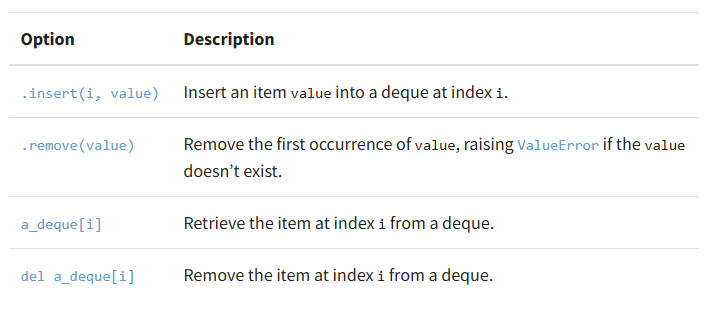

In [42]:
from functions import picture
picture('skjsБез имени.png')

In [33]:
from collections import deque

letters = deque("abde")

letters.insert(2, "c")
letters

deque(['a', 'b', 'c', 'd', 'e'])

In [34]:
letters.remove("d")
letters

deque(['a', 'b', 'c', 'e'])

In [35]:
letters[1]

'b'

In [36]:
del letters[2]
letters

deque(['a', 'b', 'e'])

Even though deque objects support indexing, they don’t support slicing. In other words, you can’t extract a slice from an existing deque using the slicing syntax, [start:stop:step], as you would with a regular list:

In [37]:
from collections import deque

numbers = deque([1, 2, 3, 4, 5])

numbers[1:3]

TypeError: sequence index must be integer, not 'slice'

In general, performing a slicing on a linked list would be inefficient, so the operation isn’t available.

So far, you’ve seen that deque is quite similar to list. However, while list is based on arrays, deque is based on a doubly linked list.

There is a hidden cost behind deque being implemented as a doubly linked list: accessing, inserting, and removing arbitrary items aren’t efficient operations. To perform them, the interpreter has to iterate through the deque until it gets to the desired item. So, they’re O(n) instead of O(1) operations.

Here’s a script that shows how deques and lists behave when it comes to working with arbitrary items:

In [40]:
# time_random_access.py

from collections import deque
from time import perf_counter

TIMES = 10_000
a_list = [1] * TIMES
a_deque = deque(a_list)

def average_time(func, times):
    total = 0.0
    for _ in range(times):
        start = perf_counter()
        func()
        total += (perf_counter() - start) * 1e6
    return total / times

def time_it(sequence):
    middle = len(sequence) // 2
    sequence.insert(middle, "middle")
    sequence[middle]
    sequence.remove("middle")
    del sequence[middle]

list_time = average_time(lambda: time_it(a_list), TIMES)
deque_time = average_time(lambda: time_it(a_deque), TIMES)
gain = deque_time / list_time

print(f"list  {list_time:.6} μs ({gain:.6}x faster)")
print(f"deque {deque_time:.6} μs")

list  35.6566 μs (0.855511x faster)
deque 30.5046 μs


Python’s deque is optimized for operations on either end of the sequence, so they’re consistently better than lists in this regard. On the other hand, lists are better for random-access and fixed-length operations. Here are some of the differences between deques and lists in terms of performance:

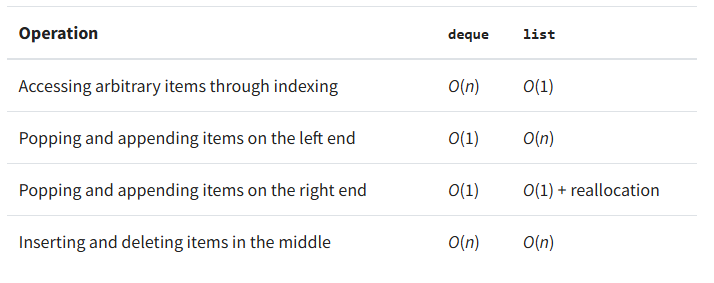

In [41]:
from functions import picture
picture('some Без имени.png')

Queues manage their items in a First-In/First-Out (FIFO) fashion. They work as a pipe where you push in new items at one end of the pipe and pop old items out from the other end. Adding an item to one end of a queue is known as an enqueue operation. Removing an item from the other end is called dequeue.

In [43]:
from collections import deque

customers = deque()

# People arriving
customers.append("Jane")
customers.append("John")
customers.append("Linda")

customers

deque(['Jane', 'John', 'Linda'])

In [44]:
# People getting tables
customers.popleft()

'Jane'

In [45]:
customers.popleft()

'John'

In [46]:
customers.popleft()

'Linda'

In [47]:
customers.popleft()

IndexError: pop from an empty deque

Rotating the Items: .rotate()

Another interesting feature of deques is the possibility to rotate their elements by calling .rotate() on a non-empty deque. This method takes an integer n as an argument and rotates the items n steps to the right. In other words, it moves n items from the right end to the left end in a circular fashion.

The default value of n is 1. If you provide a negative value to n, then the rotation is to the left:

In [48]:
from collections import deque

ordinals = deque(["first", "second", "third"])

# Rotate items to the right
ordinals.rotate()
ordinals

deque(['third', 'first', 'second'])

In [49]:
ordinals.rotate(2)
ordinals

deque(['first', 'second', 'third'])

In [50]:
# Rotate items to the left
ordinals.rotate(-2)
ordinals

deque(['third', 'first', 'second'])

In [51]:
ordinals.rotate(-1)
ordinals

deque(['first', 'second', 'third'])

Adding Several Items at Once: .extendleft()

Like regular lists, deques provide an .extend() method, which allows you to add several items to the right end of a deque using an iterable as an argument. Additionally, deques have a method called extendleft(), which takes an iterable as an argument and adds its items to the left end of the target deque in one go:

In [52]:
from collections import deque

numbers = deque([1, 2])

# Extend to the right
numbers.extend([3, 4, 5])
numbers

deque([1, 2, 3, 4, 5])

In [53]:
# Extend to the left
numbers.extendleft([-1, -2, -3, -4, -5])
numbers

deque([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

Calling .extendleft() with an iterable extends the target deque to the left. Internally, .extendleft() performs a series of individual .appendleft() operations that process the input iterable from left to right. This ends up adding the items in reverse order to the left end of the target deque.

Here are a few examples of other actions you can perform on deque objects:

In [54]:
from collections import deque

numbers = deque([1, 2, 2, 3, 4, 4, 5])

# Concatenation
numbers + deque([6, 7, 8])

deque([1, 2, 2, 3, 4, 4, 5, 6, 7, 8])

In [55]:
# Repetition
numbers * 2

deque([1, 2, 2, 3, 4, 4, 5, 1, 2, 2, 3, 4, 4, 5])

In [56]:
# Common sequence methods
numbers = deque([1, 2, 2, 3, 4, 4, 5])
numbers.index(2)

1

In [57]:
numbers.count(4)

2

In [58]:
# Common mutable sequence methods
numbers.reverse()
numbers

deque([5, 4, 4, 3, 2, 2, 1])

In [59]:
numbers.clear()
numbers

deque([])

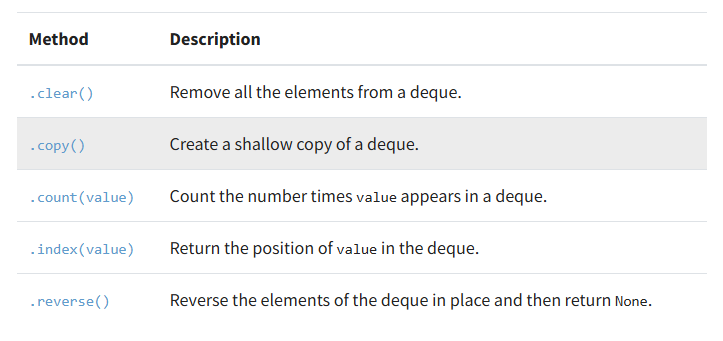

In [60]:
picture('вапвапБез имени.png')

Unlike lists, deques don’t include a .sort() method to sort the sequence in place. This is because sorting a linked list would be an inefficient operation. If you ever need to sort a deque, then you can still use sorted().